<a href="https://colab.research.google.com/github/azharm2412/PCD_Assignment01/blob/main/PCD_Assignment01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Nama**  : Azhar Maulana

**NIM**  : 24/533487/PA/22582

**Kelas**: KOM

# Import from Drive

In [39]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


# Import Library

In [40]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

from google.colab.patches import cv2_imshow

# Menampilkan Gambar dan Ukuran

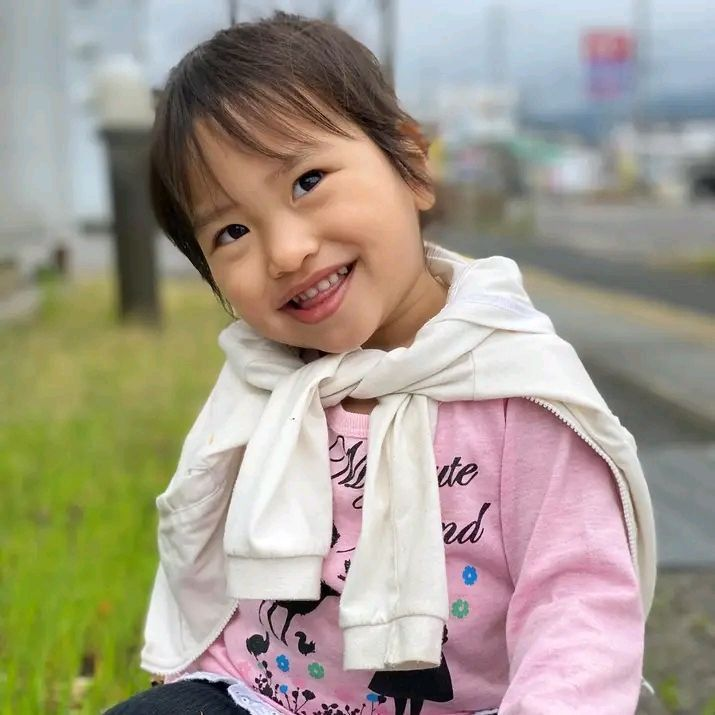

Ukuran gambar: (715, 715, 3)


In [56]:
img = cv.imread("/gdrive/MyDrive/00_sample ritsuki.jpg", cv.IMREAD_COLOR)
cv2_imshow(img)

print("Ukuran gambar:", img.shape)

# Down Sampling


## Max Pooling

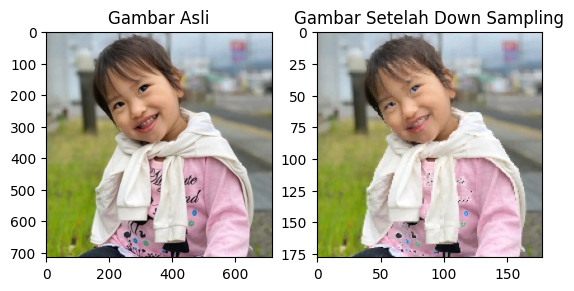

In [63]:
def max_down_sampling_color(img, scale_factor):
  height, width, channels = img.shape
  new_height = height // scale_factor
  new_width = width // scale_factor

  result = np.zeros((new_height, new_width, channels), dtype=img.dtype)

  for c in range(channels):
    for i in range(new_height):
      for  j in range(new_width):
        result[i, j, c] = np.max(img[i*scale_factor:(i+1)*scale_factor, j*scale_factor:(j+1)*scale_factor, c])

  return result

# convert bgr -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = max_down_sampling_color(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Down Sampling')
plt.show()

### Analisis Down Sampling menggunakan Max
**Max Pooling** bekerja dari setiap blok piksel dengan hanya memilih nilai maksimum.Di sini saya mencoba menggunakan skala 4x lebih kecil dan terlihat bahwa gambar terlihat kotak-kotak. Karena memilih nilai maksimum dari setiap blok, hal ini menyebabkan detail-detail kecil yang paling terang menonjol. Perhatikan pada bagian mata dan bajunya, warnanya jadi lebih menonjol dan kontras. Pada gambar tersebut, max pooling akan memberikan hasil yang lebih "tajam" pada bagian tepi (edges) karena pada gambar tersebut intensitas tinggi cenderung dominan. Namun, apabila gambar dominan berwarna hitam/gelap dapat menghilangkan detail halus di area yang lebih gelap karena nilai kecil diabaikan.




## Avarage Pooling

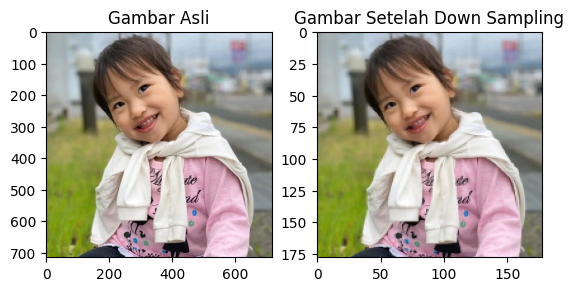

In [64]:
def avg_down_sampling_color(img, scale_factor):
  height, width, channels = img.shape
  new_height = height // scale_factor
  new_width = width // scale_factor

  result = np.zeros((new_height, new_width, channels), dtype=img.dtype)

  for c in range(channels):
    for i in range(new_height):
      for  j in range(new_width):
        result[i, j, c] = np.average(img[i*scale_factor:(i+1)*scale_factor, j*scale_factor:(j+1)*scale_factor, c])

  return result

# convert bgr -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = avg_down_sampling_color(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Down Sampling')
plt.show()

### Analisis Down Sampling menggunakan Avarage
Prinsip kerja dari **Avarage Pooling** adalah dengan menghitung rata-rata dari setiap blok piksel. Di sini saya menggunakan skala 4x lebih kecil. Perhatikan bahwa gambar yang dihasilakan lebih mulus dibanding dengan metode max di atas. Berbeda dengan max pooling yang menonjolkan piksel paling terang, avarage pooling menghasilkan transisi warna yang lebih halus dan merata. Hal ini akan memberikan efek smoothing karena setiap piksel hasil merupakan rata-rata dari tetangganya. Namun, detail halus dari gambar akan cenderung hilang walaupun strukturnya secara keseluruhan tetap terlihat jelas. Dengan menggunakan metode ini, noise akan cenderung berkurang karena nilai ekstrem tereduksi oleh rata-rata.

## Medium Pooling

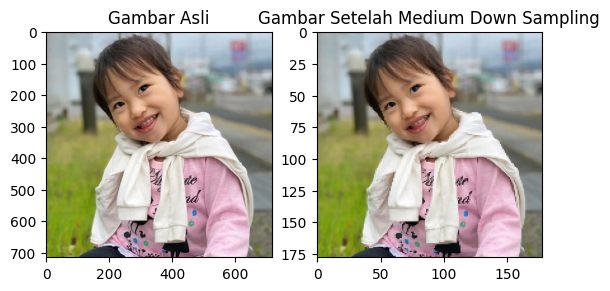

In [60]:
def med_down_sampling_color(img, scale_factor):
  height, width, channels = img.shape
  new_height = height // scale_factor
  new_width = width // scale_factor

  result = np.zeros((new_height, new_width, channels), dtype=img.dtype)

  for c in range(channels):
    for i in range(new_height):
      for  j in range(new_width):
        result[i, j, c] = np.median(img[i*scale_factor:(i+1)*scale_factor, j*scale_factor:(j+1)*scale_factor, c])

  return result

# convert bgr -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = med_down_sampling_color(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Medium Down Sampling')
plt.show()

### Analisis Down Sampling menggunakan Median
Prinsip kerja down sampling menggunakan median adalah dengan memilih nilai median dari blok piksel yang sudah diurutkan. Di sini saya menggunakan skala 4x lebih kecil.
Mirip dengan Average Pooling, banyak detail halus dari gambar asli hilang karena setiap piksel baru mewakili area yang lebih besar. Namun, Median Pooling tidak membuat gambar terlihat kabur atau buram. Dengan menggunakan metode ini, detail-detail kecil dalam gambar masih terlihat "natural" dibanding dengan menggunakan avarage.

## Kesimpulan Down Sampling

Penggunaan down sampling pada suatu citra tergantung pada karakteristik citra yang dimiliki. Hal ini berkaitan dengan masing-masing karakteristik yang dimiliki oleh tiap metode yang digunakan, yaitu:

1. **Max Pooling** → menonjolkan nilai piksel
terbesar pada suatu blok sehingga garis tepi dan area terang lebih jelas. Cocok jika tujuan utama adalah menekankan fitur kontras atau edge.

2. **Average Pooling** → menghitung rata-rata piksel pada blok sehingga menghasilkan citra yang lebih halus dan sederhana. Cocok untuk representasi secara keseluruhan, tetapi dapat mengaburkan detail halus.

3. **Median Pooling** → mengambil nilai tengah piksel sehingga detail-detail kecil tetap terjaga sambil mengurangi gangguan seperti bintik-bintik hitam atau putih. Cocok untuk mempertahankan bentuk objek utama dengan hasil yang seimbang.

# Up Sampling

## NN (Nearest Neighbors)

**Cara Manual:**

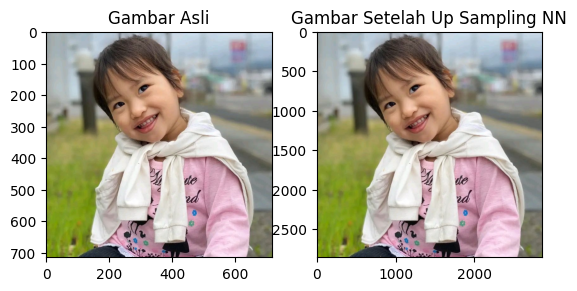

In [62]:
def nn_upsampling(img, scale_factor):
    height, width, channels = img.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    result = np.zeros((new_height, new_width, channels), dtype=img.dtype)

    for c in range(channels):
        for i in range(new_height):
            for j in range(new_width):
                # Cari koordinat piksel terdekat di gambar asli
                original_i = int(i / scale_factor)
                original_j = int(j / scale_factor)
                result[i, j, c] = img[original_i, original_j, c]
    return result

# convert bgr -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = nn_up_sampling(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Up Sampling NN')
plt.show()

**Menggunakan Library OpenCV:**

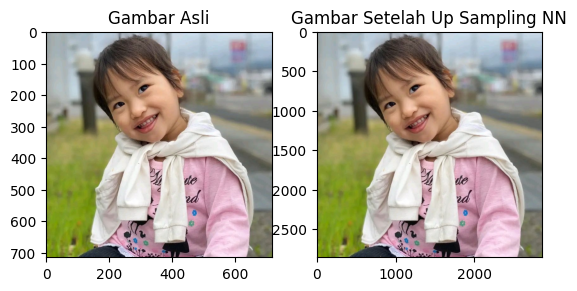

In [58]:
def nn_upsampling(img, scale_factor):
    height, width, channels = img.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    result = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_NEAREST)

    return result

# convert bgr -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = nn_up_sampling(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Up Sampling NN')
plt.show()

### Analisis Metode Nearest Neighbors
Pada gambar hasil up sampling menggunakan nearest neighbors tersebut, terlihat jelas bahwa kualitas gambar menurun, meskipun ukurannya membesar. Metode ini merupakan algoritma up sampling yang paling sederhana. Ia bekerja dengan mengisi piksel baru di gambar yang diperbesar dengan nilai piksel terdekat dengan gambar asli. Perhatikan juga metode ini memiliki kecepatan pemrosesan yang sangat tinggi. Hal ini terjadi karena tidak memerlukan perhitungan yang kompleks. Namun, gambar yang dihasilkan memiliki kualitas gambar yang rendah.


## Bilinear

**Cara Manual:**

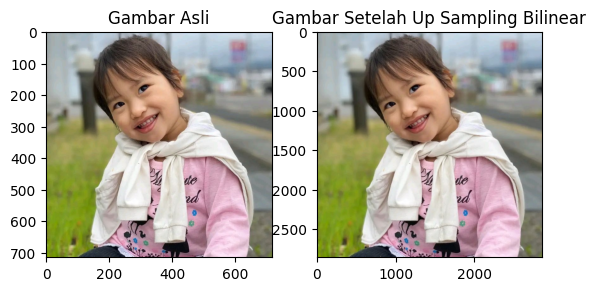

In [61]:
def bilinear_upsampling(img, scale_factor):
    height, width, channels = img.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    result = np.zeros((new_height, new_width, channels), dtype=img.dtype)

    # Hitung rasio perbesaran
    h_scale = float(height - 1) / (new_height - 1)
    w_scale = float(width - 1) / (new_width - 1)

    for c in range(channels):
        for i in range(new_height):
            for j in range(new_width):
                # Cari koordinat di gambar asli
                x = j * w_scale
                y = i * h_scale

                # Dapatkan koordinat dari 4 piksel terdekat
                x1 = int(x)
                y1 = int(y)
                x2 = min(width - 1, x1 + 1)
                y2 = min(height - 1, y1 + 1)

                # Hitung bobot
                fx = x - x1
                fy = y - y1

                # Interpolasi pada sumbu x
                q1 = img[y1, x1, c] * (1 - fx) + img[y1, x2, c] * fx
                q2 = img[y2, x1, c] * (1 - fx) + img[y2, x2, c] * fx

                # Interpolasi pada sumbu y
                result[i, j, c] = int(q1 * (1 - fy) + q2 * fy)
    return result

# convert brg -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = bilinear_upsampling(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Up Sampling Bilinear')
plt.show()

**Menggunakan Library OpenCV:**

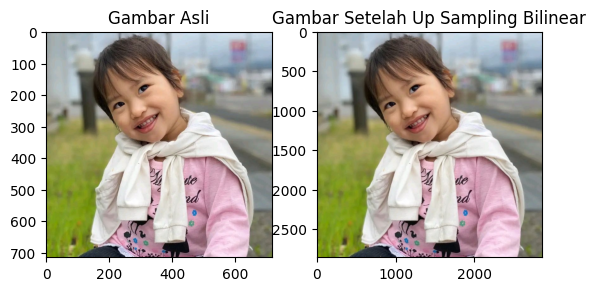

In [59]:
def bilinear_upsampling(img, scale_factor):
    height, width, channels = img.shape
    new_height = height * scale_factor
    new_width = width * scale_factor

    result = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_LINEAR)

    return result

# convert brg -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = bilinear_upsampling(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Up Sampling Bilinear')
plt.show()

### Analisis Metode Bilinear
Di sini saya menggunakan skala 4x lipat dan terlihat bahwa dibandingkan dengan hasil nearest neighbor, gambar yang dihasilkan dengan metode bilinear lebih halus. Seperti misalnya di bagian pipi dan hidung. Hal ini terjadi karena algoritma menginterpolasi nilai piksel baru berdasarkan rata-rata piksel terdekat dari gambar asli. Namun, metode ini terdapat kekurangan, yaitu sedikit kehilangan ketajaman. Karena proses "menghaluskan" gambar, detail-detail kecil bisa terlihat sedikit buram.

## Bicubic

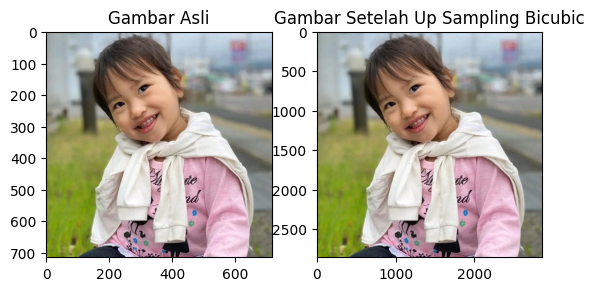

In [52]:
def cubic_up_sampling(img, scale_factor):
  height, width, channels = img.shape
  new_height = height * scale_factor
  new_width = width * scale_factor

  # menggunakan implementasi library OpenCV
  # karena apabila ditulis manual akan sangat kompleks
  result = cv.resize(img, (new_width, new_height), interpolation=cv.INTER_CUBIC)

  return result

# convert brg -> rgb
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)

scale_factor = 4

result = cubic_up_sampling(img_rgb, scale_factor)
plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Gambar Asli')
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.title('Gambar Setelah Up Sampling Bicubic')
plt.show()

### Analisis Metode Bicubic
Di sini saya menggunakan skala 4x lipat dan terlihat bahwa metode bicubic menghasilkan gambar yang lebih halus dibandingkan metode nearest neighbors dan bilinear. Terlihat juga bahwa bicubic berhasil menjaga ketajaman dan detail gambar yang baik. Dibandingkan dengan 2 metode sebelumnya, bicubic membutuhkan waktu pemrosesan yang lebih lama.

## Kesimpulan Up Sampling
Dari ketiga metode up sampling yang sudah dicoba, setiap metode memiliki kelebihan dan kekurangannya sendiri.
1. **Nearest Neighbor** → metode ini adalah metode yang paling sederhana, setiap piksel baru hanya mengambil nilai dari piksel terdekat di gambar asli. Gambar yang dihasilkan sedikit kasar, bahkan memiliki kualitas di bawah gambar asli. Apabila kecepatan adalah yang terpenting dan kualitas gambar bukan prioritas utama, maka metode ini paling cocok digunakan. Misalnya untuk pratinjau cepat.
2. **Bilinear** → metode ini menggunakan rata rata dari empat piksel tetangga untuk menghaluskan gambar. Terlihat dari hasil gambar yang lebih halus dan tidak terlihat pecah. Namun, gambar kehilangan ketajaman yang membuat gambar terlihat agak buram. Metode ini cocok untuk aplikasi yang membutuhkan keseimbangan antara kecepatan dan kualitas, di mana gambar yang halus lebih penting dibanding ketajaman.
3. **Bicubic** → Metode ini merupakan metode yang paling kompleks, tetapi menghasilkan gambar dengan kualitas terbaik dengan ketajaman dan detail yang masih terjaga. Metode ini cocok untuk pengeditan foto profesional atau untuk mencetak gambar dengan resolusi tinggi.